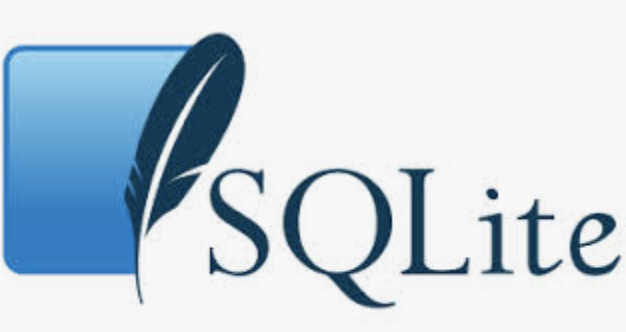

- Conectar;
- Criar um banco de dados tabelas;
- Inserir registros;
- Queries de consulta de dados em linguagem SQL.

**Importante**: O mais importante dessa aula é aprender os comandos SQL e não os comandos da biblioteca SQlite3!

In [10]:
#SQLite é uma biblioteca que implementa um banco de dados SQL embutido. 

import sqlite3

In [11]:
#Criando um banco de dados e estabelecendo uma conexão com ele:

conn = sqlite3.connect("primeiro_banco_dados.db") 

print(conn)

In [12]:
# Cursor: é através dessa variável que criamos tabelas, inserimos registros e fazemos as queries de operações no banco

cursor = conn.cursor() 

**Importante**: Nos bancos de dados relacionais salvamos os dados em tabelas. Essas tabelas possuem atributos (colunas) e os registros (linhas).
No caso de DB's relacionais nós definimos as tabelas e os tipos de dados previamente. Lembram que nos bancos não-relacionais é diferente? Nos não-relacionais não precisamos fazer isso!

 - **CREATE TABLE**: Comando usado para criar tabelas
 
 ```sql
 CREATE TABLE nome_tabela (coluna1 tipo, coluna2 tipo, ...);
 ```
 
 Geralmente usamos letras maiúsculas para escrever os comandos em linguagem SQL;

In [13]:
#Criando nossa primeira tabela. O método execute recebe uma query SQL e a executa;

cursor.execute("CREATE TABLE cadastro_cliente (user_id integer, nome text, idade integer, cidade text, email text)")

In [14]:
#Usamos essa query para ver quais as tabelas estão no banco. 

cursor.execute('SELECT name from sqlite_master where type= "table"')

#O comando fetchall é responsável por apresentar o resultado da query.
cursor.fetchall()

[('cadastro_cliente',)]

- **SELECT**: Usamos esse comando para selecionar dados na tabela

In [15]:
# Vamos ver o que tem nessa nossa tabela? 
# * == ALL : Seleciona todo os campos (atributos, colunas) da tabela

cursor.execute("SELECT * FROM cadastro_cliente")
cursor.fetchall()

[]

- **INSERT INTO**: Usado para inserir registros em uma tabela

Os dados do tipo text precisam estar com aspas como as strings que aprendemos aqui em python e tem que ser aspas simples, porque estamos usando aspas duplas para a query, se nao o python faz confusao.

In [16]:
# precisamos dizer em qual tabela e também escrever no formato de dados previsto quando criamos a tabela:

cursor.execute("INSERT INTO cadastro_cliente VALUES(123, 'maria', 40, 'São Paulo', 'maria@gmail.com')") 
conn.commit()

#Commit é um comando como no git, você deu um comando ali em cima para alterar a tabela e o commit é pra de fato 
#guardarmos a informação no banco.

In [18]:
# Verificando se nossa tabela foi de fato alterada:
cursor.execute("SELECT * FROM cadastro_cliente")
cursor.fetchall()

[(123, 'maria', 40, 'São Paulo', 'maria@gmail.com')]

In [19]:
# Selecionando dois campos, nome e idade:

cursor.execute("SELECT nome, idade FROM cadastro_cliente ") 
cursor.fetchall()

[('maria', 40)]

In [20]:
#Vamos  novamente? Vamos inserir agora 2 registros

cursor.execute("INSERT INTO cadastro_cliente VALUES(456, 'pedro',22, 'Rio de Janeiro', 'pedrinho@gmail.com')") 
cursor.execute("INSERT INTO cadastro_cliente VALUES(789, 'joão',35, 'São Paulo', 'joaojoao@gmail.com')") 
cursor.execute("INSERT INTO cadastro_cliente VALUES(901, 'Paulo',56, 'São Paulo', 'paulo123@gmail.com')") 
conn.commit()

In [21]:
#Visualizando todos os nossos registros:

cursor.execute("SELECT * FROM cadastro_cliente")
cursor.fetchall()

[(123, 'maria', 40, 'São Paulo', 'maria@gmail.com'),
 (456, 'pedro', 22, 'Rio de Janeiro', 'pedrinho@gmail.com'),
 (789, 'joão', 35, 'São Paulo', 'joaojoao@gmail.com'),
 (901, 'Paulo', 56, 'São Paulo', 'paulo123@gmail.com')]

**SELECT DISTINCT**: Esse comando é usado para retornar apenas valores distintos.
<br>
<br>

```sql
SELECT DISTINCT coluna1, coluna2, ... FROM nome_tabela;
```

In [22]:
cursor.execute("SELECT cidade FROM cadastro_cliente")
cursor.fetchall()

[('São Paulo',), ('Rio de Janeiro',), ('São Paulo',), ('São Paulo',)]

In [23]:
cursor.execute("SELECT DISTINCT cidade FROM cadastro_cliente")
cursor.fetchall()

[('São Paulo',), ('Rio de Janeiro',)]

**SELECT WHERE**: Seleciona dados de acordo com alguma condição. Usada para filtrar registros
 <br> 
 <br>
```sql
    SELECT coluna1, coluna2, ...FROM nome_tabela WHERE condicao_verdadeira
```



In [24]:
cursor.execute("SELECT * FROM cadastro_cliente WHERE nome = 'maria'")
cursor.fetchall()

[(123, 'maria', 40, 'São Paulo', 'maria@gmail.com')]

**SELECT ORDER BY:** Seleciona dados ordenando em ordem crescente ou decrescente os dados de acordo com os valores de uma coluna específica. 
<br>
<br>
```sql
SELECT coluna1, coluna2... FROM nome_tabela ORDER BY coluna1,coluna2... DESC/ASC
```
    

In [25]:
cursor.execute("SELECT nome, idade FROM cadastro_cliente ORDER BY idade DESC")
cursor.fetchall()

[('Paulo', 56), ('maria', 40), ('joão', 35), ('pedro', 22)]

**SELECT GROUP BY**: Seleciona dados agrupando os dados por uma(+ de uma) coluna(s) específica(s).
<br>
<br>
```sql
SELECT coluna1, coluna2... FROM nome_tabela GROUP BY coluna1...
```

In [27]:
cursor.execute("SELECT COUNT(user_id), cidade FROM cadastro_cliente GROUP BY cidade ")
cursor.fetchall()

[(1, 'Rio de Janeiro'), (3, 'São Paulo')]

In [28]:
#podemos fazer consultas mais complexas, como por exemplo:

cursor.execute("SELECT COUNT(user_id), cidade FROM cadastro_cliente GROUP BY cidade ORDER BY COUNT(user_id) DESC")
cursor.fetchall()

[(3, 'São Paulo'), (1, 'Rio de Janeiro')]

In [29]:
#Criando outra tabela:

cursor.execute("CREATE TABLE compras_cliente (user_id integer, qtd_produtos integer, \
                valor_compra decimal, local_compra text)")


In [30]:
cursor.execute("INSERT INTO compras_cliente VALUES(123,3 , 150.70, 'loja01')") 
cursor.execute("INSERT INTO compras_cliente VALUES(456,1 , 20.35, 'loja02')") 
cursor.execute("INSERT INTO compras_cliente VALUES(789,6 , 437, 'loja02')") 
conn.commit()

In [31]:
cursor.execute("SELECT * FROM compras_cliente ")
cursor.fetchall()

[(123, 3, 150.7, 'loja01'), (456, 1, 20.35, 'loja02'), (789, 6, 437, 'loja02')]

**SELECT COUNT/AVG/SUM**: <br>
Count: Retorna o número de valores de uma determinada coluna.<br>
Avg: Retorna a média dos valores de uma determinada coluna.<br>
Sum: Retorna a soma dos valores de uma determinada coluna.
```sql
SELECT COUNT/AVG/SUM(nome_coluna) FROM nome_tabela
```

In [32]:
#Quantos usuários fizeram compras?
cursor.execute("SELECT COUNT(user_id) FROM compras_cliente")
cursor.fetchall()

[(3,)]

In [33]:
#Quantos usuários fizeram compras na loja01??
cursor.execute("SELECT COUNT(user_id) FROM compras_cliente WHERE local_compra=='loja01'")
cursor.fetchall()

[(1,)]

In [34]:
#Qual foi o valor_medio de gasto de cada usuário?

cursor.execute("SELECT AVG(valor_compra) FROM compras_cliente")
cursor.fetchall()

[(202.6833333333333,)]

In [35]:
#Qual foi o total gasto pelos usuários?

cursor.execute("SELECT SUM(valor_compra) FROM compras_cliente")
cursor.fetchall()

[(608.05,)]

### E se quisessemos saber qual cidade tem um gasto médio maior? São Paulo ou Rio?

Cada informação está em uma tabela diferente, e agora?? Let's join!

### A cláusula "join" é usada para combinar/relacionar linhas de duas tabelas baseado em uma coluna comum entre eles (chamamos de chave) -- Banco de dados relacional, lembram?


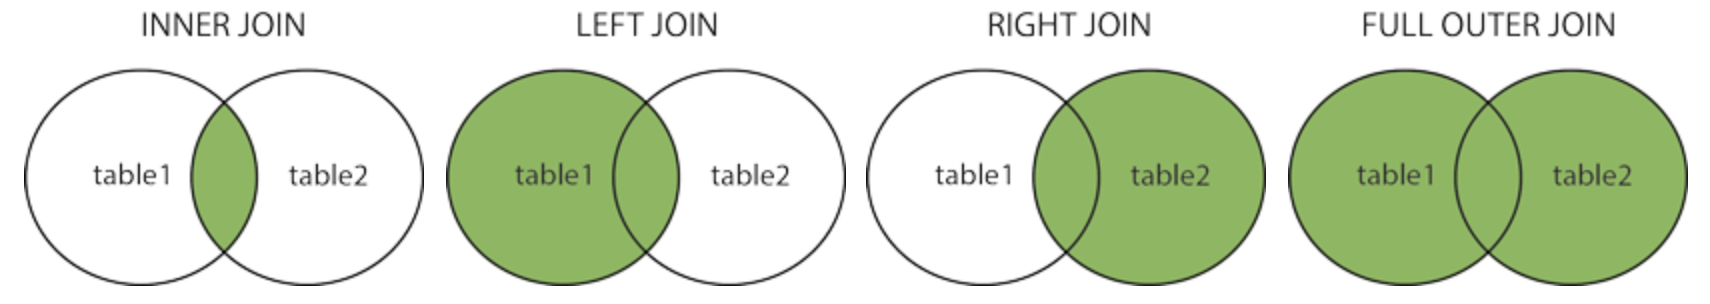

- Inner join: Retorna os registros que estão em ambas as tabelas
- Left join: Retorna todos os registros da tabela da esquerda e traz os campos dos registros da tabela da direita que deram match com a tabela da esquerda.
- Right join: Retorna todos os registros da tabela da direita e traz os registros da tabela da esquerda que deram match com a tabela da direita.
- Full join: Retorna todos os registros quando tem um match com a tabela da direita ou da esquerda.

In [ ]:
#podemos fazer apenas primeiro um lef join por exemplo, pra ficar mais claro pra vocês o que ele faz:

In [36]:
cursor.execute("SELECT cc.user_id, cc.nome, cc.cidade, ccli.valor_compra FROM cadastro_cliente as cc LEFT JOIN \
                compras_cliente as ccli ON cc.user_id == ccli.user_id")
cursor.fetchall()

[(123, 'maria', 'São Paulo', 150.7),
 (456, 'pedro', 'Rio de Janeiro', 20.35),
 (789, 'joão', 'São Paulo', 437),
 (901, 'Paulo', 'São Paulo', None)]

In [37]:
# Respondendo nossa pergunta ali de cima: Precisamos primeiro pegar todas as cidades, então vamos usar a tabela
# cadastro_cliente e cruzar ela com a tabela de compras para termos o gastos dos clientes também.

#A chave/coluna que relaciona essas tabelas é a coluna user_id:

cursor.execute("SELECT AVG(valor_compra) as valor_medio, cidade FROM cadastro_cliente\
                LEFT JOIN compras_cliente\
                ON cadastro_cliente.user_id == compras_cliente.user_id\
                GROUP BY cidade\
                ORDER BY valor_medio DESC ")
cursor.fetchall()

[(293.85, 'São Paulo'), (20.35, 'Rio de Janeiro')]

In [38]:
#Vejam agora a diferença com o inner join:

cursor.execute("SELECT cc.user_id, cc.nome, cc.cidade, ccli.valor_compra FROM cadastro_cliente as cc INNER JOIN \
                compras_cliente as ccli ON cc.user_id == ccli.user_id")
cursor.fetchall()

[(123, 'maria', 'São Paulo', 150.7),
 (456, 'pedro', 'Rio de Janeiro', 20.35),
 (789, 'joão', 'São Paulo', 437)]